CNN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

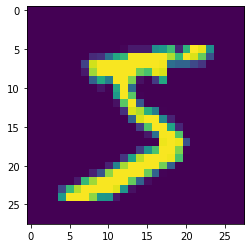

In [ ]:
plt.imshow(single_image)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
x_train = x_train/255
x_test = x_test/255


In [ ]:
scaled_image = x_train[0]
print(scaled_image)
scaled_image.max()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

1.0

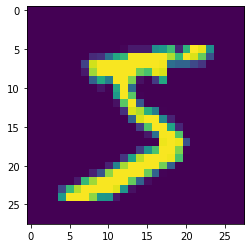

In [ ]:
plt.imshow(scaled_image)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))#softmax bcz of multi class classification
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1393 - accuracy: 0.9585 - val_loss: 0.0567 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0457 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0409 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0407 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0436 - val_accuracy: 0.9878


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139287,0.958500,0.056709,0.9813
1,0.045810,0.985583,0.045701,0.9843
2,0.028847,0.990983,0.040895,0.9859
3,0.019737,0.993450,0.040683,0.9877
4,0.013356,0.995817,0.043604,0.9878


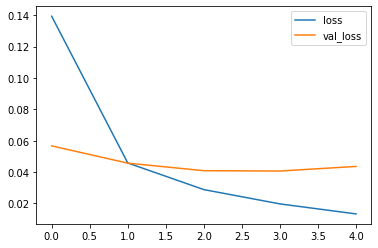

In [ ]:
metrics[['loss','val_loss']].plot()

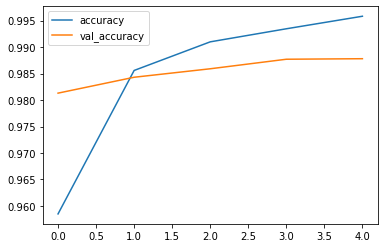

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0436 - accuracy: 0.9878


[0.043603502213954926, 0.9878000020980835]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



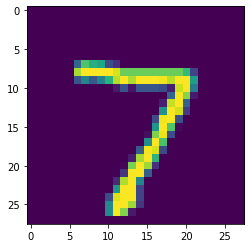

In [ ]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [ ]:
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])